![poster](./data/4.그린벨트.png)
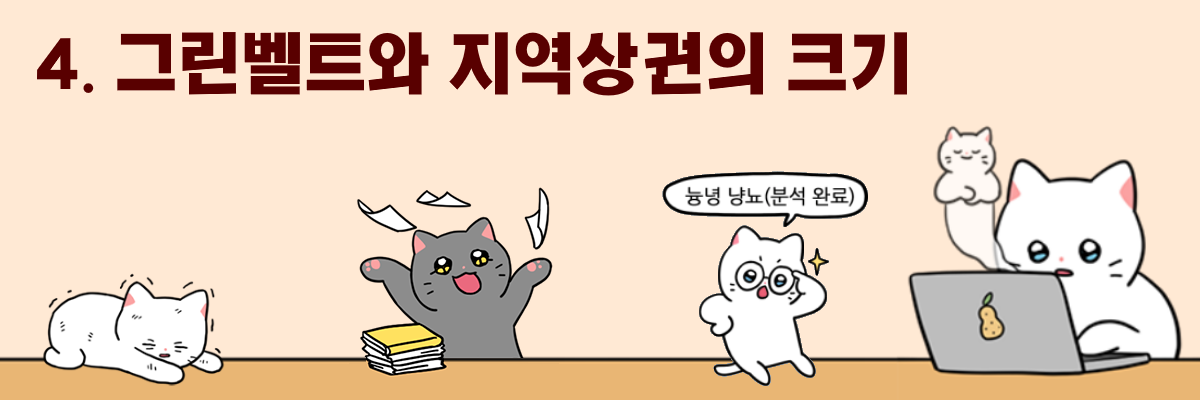

# 4. 그린벨트와 지역상권의 크기
#### 2조 김동훈, 이동언, 이소영, 임낙현, 정희택

## 📖라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [2]:
from matplotlib import font_manager, rc
# font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## 🌌 자료 출처


1. 그린벨트 넓이
https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1003


2. 각 도시의 지방행정 인허가 데이터 https://www.localdata.go.kr/data/dataView.do

3. 전국의 일반음식점 데이터 https://www.localdata.go.kr/data/dataView.do?ctgryGbn=07&groupGbn=24&opnSvcId=07_24_04_P

In [3]:
df_green=pd.read_excel('green.xls')

In [4]:
# 데이터 확인용 코드

# df_green.describe()
# df_green.describe(include='object')
# df_green.ndim
# df_green.index
# df_green.info()

In [5]:
df_green.head()

,도시,2000해제면적,2000지정면적,2001해제면적,2001지정면적,2002해제면적,2002지정면적,2003해제면적,2003지정면적,2004해제면적,...,2016해제면적,2016지정면적,2017해제면적,2017지정면적,2018해제면적,2018지정면적,2019해제면적,2019지정면적,2020해제면적,2020지정면적
0,전국 계,12,"5,386",380,"5,006",390,"4,615",486,"4,130",25,...,5,"3,854",7,"3,846",5,"3,841",3,"3,837",8,"3,829"
1,서울특별시,-,168,-,168,1,167,1,166,4,...,0,151,0,151,0,150,0,150,0,150
2,부산광역시,-,389,-,389,86,303,0,303,5,...,0,253,2,251,0,251,0,251,2,250
3,대구광역시,-,419,-,419,-,419,1,418,-,...,0,401,0,401,0,401,0,401,1,400
4,인천광역시,-,97,-,97,-,97,-,97,-,...,0,88,0,88,0,88,0,88,0,88


## ✂ 데이터 전처리

In [6]:
# 컬럼들의 NULL값을 0으로 준 후 

for i in range(0,21):
    df_green[str(2000+i)+'지정면적']=df_green[str(2000+i)+'지정면적'].replace('-', '0')
    
for i in range(0,21):
    df_green[str(2000+i)+'지정면적']=df_green[str(2000+i)+'지정면적'].str.replace(',', '').astype('int64')

In [7]:
df_green=df_green.drop(0)

In [8]:
df_green.head()

,도시,2000해제면적,2000지정면적,2001해제면적,2001지정면적,2002해제면적,2002지정면적,2003해제면적,2003지정면적,2004해제면적,...,2016해제면적,2016지정면적,2017해제면적,2017지정면적,2018해제면적,2018지정면적,2019해제면적,2019지정면적,2020해제면적,2020지정면적
1,서울특별시,-,168,-,168,1,167,1,166,4,...,0,151,0,151,0,150,0,150,0,150
2,부산광역시,-,389,-,389,86,303,0,303,5,...,0,253,2,251,0,251,0,251,2,250
3,대구광역시,-,419,-,419,-,419,1,418,-,...,0,401,0,401,0,401,0,401,1,400
4,인천광역시,-,97,-,97,-,97,-,97,-,...,0,88,0,88,0,88,0,88,0,88
5,광주광역시,-,268,-,268,-,268,9,259,-,...,1,245,1,244,0,244,0,244,1,244


In [9]:
df_green_city_list=list(df_green['도시'][:])
print(df_green_city_list,end=' ')
len(df_green_city_list)

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'] 

17

In [10]:
set_of_column=[str(2000+i)+'지정면적' for i in range(21)]
print(' '.join(set_of_column))

2000지정면적 2001지정면적 2002지정면적 2003지정면적 2004지정면적 2005지정면적 2006지정면적 2007지정면적 2008지정면적 2009지정면적 2010지정면적 2011지정면적 2012지정면적 2013지정면적 2014지정면적 2015지정면적 2016지정면적 2017지정면적 2018지정면적 2019지정면적 2020지정면적


##

## ⚙ 그래프 함수 정의

In [ ]:
for i in range(21):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize=(18, 8))
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
    plt.ylim([0, 1300])

    ax = sns.barplot(data= df_green,x="도시",y=set_of_column[i])
    plt.title('{}년도 그린벨트 면적'.format(2000+i), fontsize= 30, fontweight='bold')
    ax.set_xticklabels(df_green['도시'] , fontweight='bold')

    # plt.savefig(str(2000+i)+'년도 도시별 그린벨트 넓이.png',dpi=300)
    plt.show()

![poster](.\\data\\그래프.gif)

In [12]:
concat_column=[str(2000+i)+'지정면적' for i in range(0,21)]
# print(concat_column,end=' ')
res_list=['도시']+concat_column
print(res_list,end=' ')

['도시', '2000지정면적', '2001지정면적', '2002지정면적', '2003지정면적', '2004지정면적', '2005지정면적', '2006지정면적', '2007지정면적', '2008지정면적', '2009지정면적', '2010지정면적', '2011지정면적', '2012지정면적', '2013지정면적', '2014지정면적', '2015지정면적', '2016지정면적', '2017지정면적', '2018지정면적', '2019지정면적', '2020지정면적'] 

In [13]:
df_green_concat=pd.DataFrame(df_green,columns=res_list)

In [14]:
df_green_concat.head()

,도시,2000지정면적,2001지정면적,2002지정면적,2003지정면적,2004지정면적,2005지정면적,2006지정면적,2007지정면적,2008지정면적,...,2011지정면적,2012지정면적,2013지정면적,2014지정면적,2015지정면적,2016지정면적,2017지정면적,2018지정면적,2019지정면적,2020지정면적
1,서울특별시,168,168,167,166,162,159,158,158,156,...,152,151,0,151,151,151,151,150,150,150
2,부산광역시,389,389,303,303,298,279,277,276,275,...,268,258,253,253,253,253,251,251,251,250
3,대구광역시,419,419,419,418,418,418,409,404,404,...,402,402,401,401,401,401,401,401,401,400
4,인천광역시,97,97,97,97,97,97,91,91,91,...,89,89,89,88,88,88,88,88,88,88
5,광주광역시,268,268,268,259,259,255,250,249,247,...,247,247,247,247,247,245,244,244,244,244


In [15]:
df_green_concat_T=df_green_concat.T
df_green_concat_T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2000지정면적,168,389,419,97,268,317,319,0,1293,294,237,68,225,375,118,717,83
2001지정면적,168,389,419,97,268,317,319,0,1291,0,237,68,225,375,118,717,0
2002지정면적,167,303,419,97,268,317,284,0,1290,0,57,68,225,287,118,717,0
2003지정면적,166,303,418,97,259,314,279,0,1282,0,57,68,0,287,118,484,0
2004지정면적,162,298,418,97,259,314,279,0,1276,0,57,66,0,284,118,480,0
2005지정면적,159,279,418,97,255,312,277,0,1259,0,56,66,0,277,118,472,0
2006지정면적,158,277,409,91,250,311,277,0,1224,0,55,66,0,276,115,472,0
2007지정면적,158,276,404,91,249,311,273,0,1220,0,55,66,0,274,115,470,0
2008지정면적,156,275,404,91,247,309,271,0,1213,0,54,66,0,272,115,466,0


In [16]:
def year_of_green():
    i=int(input())
    aa=df_green_concat_T[i+1]
    aa.reset_index()
    bb=aa.reset_index()
    bb.columns=['연도',df_green_city_list[i]]
    bb=bb.drop(0)
    bb['연도']=bb['연도'].str.replace('지정면적','')
    
    # df_green = df_green.sort_values(by='2020지정면적')

    sns.set_style('darkgrid')
    fig = plt.figure(figsize=(15, 8))
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    sns.barplot(data=bb,x= "연도",y=df_green_city_list[i])
    plt.show()
    
    
# year_of_green()

In [17]:
print(df_green_city_list,end=' ')

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'] 

In [ ]:
for i in range(17):
    aa=df_green_concat_T[i+1]
    aa.reset_index()
    bb=aa.reset_index()
    bb.columns=['연도',df_green_city_list[i]]
    bb=bb.drop(0)
    bb['연도']=bb['연도'].str.replace('지정면적','')
    
    # df_green = df_green.sort_values(by='2020지정면적')

    sns.set_style('darkgrid')
    fig = plt.figure(figsize=(15, 8))
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    sns.barplot(data=bb,x= "연도",y=df_green_city_list[i])
    plt.show()

## 💣 그린벨트 정보와의 비교로 인사이트 도출을 위한 타 데이터 분석

큰 사이즈의 데이터를 핸들링 해 보고 싶어서 row가 굉장히 많은 데이터를 선택해 보았습니다.

데이터의 날짜가 정수형이길래 날짜타입으로 변경한 후 비교해 보려 하였습니다. 하지만...

In [19]:
# df_food=pd.read_csv('food.csv',encoding='cp949')

In [20]:
# df_food.info()

In [21]:
# df_food.head()

In [22]:
# df_food[df_food['영업상태명']!='폐업']

In [23]:
# df_food['인허가일자'].nunique()

In [24]:
# 처음에 199907 이라는 일 수가 표시되어 있지 않은 row때문에 int인 날짜 행의 데이터 타입을 날짜타입으로 변경할수가 없어서 행 삭제를 진행하였습니다.

# drop_idx=df_food[df_food['인허가일자']==199907].index
# df_food['인허가일자']=df_food['인허가일자'].drop(drop_idx)

In [25]:
# df_food['인허가일자'].dropna()

In [26]:
# df_food = df_food.fillna(0)

In [27]:
# 두번째로 199907 이라는 행을 삭제해버리자 int 타입이였던 컬럼이 float타입으로 바뀌게 되어 다시 int로 바꾸는 작업을 하였습니다.

# df_food['인허가일자']=df_food['인허가일자'].astype('int64')

In [28]:
# df_food.head()

In [29]:
# df_food=df_food[df_food['인허가일자'] != 0]

In [30]:
# df_food.info()

In [31]:
# df_food['인허가일자']=df_food['인허가일자'].dt.strftime("%Y-%m-%d")
# df_food['인허가일자']=df_food['인허가일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

##

## ⛳ 그린벨트 넓이 변화정보를 본 후 지역별 제과점 개업수의 변동추이 비교

### 🥐 데이터 프레임 생성

In [32]:
cb_bread = pd.DataFrame({'연도':[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                        '충북 개업 제과점':[0,0,0,0,0,0,0,19,13,14,15,21,30,25,8,29,25,0,0,0,0,0]})
cb_bread
# cb_bread.info()
cb_bread=cb_bread.drop(0)
cb_bread.head(3)

,연도,충북 개업 제과점
1,2000,0
2,2001,0
3,2002,0
4,2003,0
5,2004,0
6,2005,0
7,2006,19
8,2007,13
9,2008,14
10,2009,15


In [33]:
gn_bread = pd.DataFrame({'연도':[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                        '경남 개업 제과점':[0,0,0,0,0,0,0,19,13,14,15,21,30,25,8,29,25,0,0,0,0,0]})
# gn_bread
# cb_bread.info()
gn_bread=gn_bread.drop(0)
gn_bread

,연도,경남 개업 제과점
1,2000,0
2,2001,0
3,2002,0
4,2003,0
5,2004,0
6,2005,0
7,2006,19
8,2007,13
9,2008,14
10,2009,15


In [34]:
gb_bread = pd.DataFrame({'연도':[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                        '경북 개업 제과점':[0,0,0,0,0,0,0,18,36,30,48,75,32,29,26,29,48,0,0,0,0,0]})
# gn_bread
# cb_bread.info()
gb_bread=gb_bread.drop(0)
gb_bread

,연도,경북 개업 제과점
1,2000,0
2,2001,0
3,2002,0
4,2003,0
5,2004,0
6,2005,0
7,2006,18
8,2007,36
9,2008,30
10,2009,48


In [35]:
cn_bread = pd.DataFrame({'연도':[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                        '충남 개업 제과점':[0,0,0,0,0,0,0,15,15,29,46,34,43,37,26,33,31,0,0,0,0,0]})
# gn_bread
# cb_bread.info()
cn_bread=cn_bread.drop(0)
cn_bread

,연도,충남 개업 제과점
1,2000,0
2,2001,0
3,2002,0
4,2003,0
5,2004,0
6,2005,0
7,2006,15
8,2007,15
9,2008,29
10,2009,46


데이터프레임을 다시 만들어서 그래프를 그리는데
위에서 기껏 정의한 데이터프레임을 아래에서 다시 다른것으로 바꾸어버린것을 
인지하지 못하여서 두개의 plot을 동시에 그리는데 시간을 많이 소모하였습니다.

### 🍩 그린벨트의 변동 추이가 컸던 지역(충북, 경남)

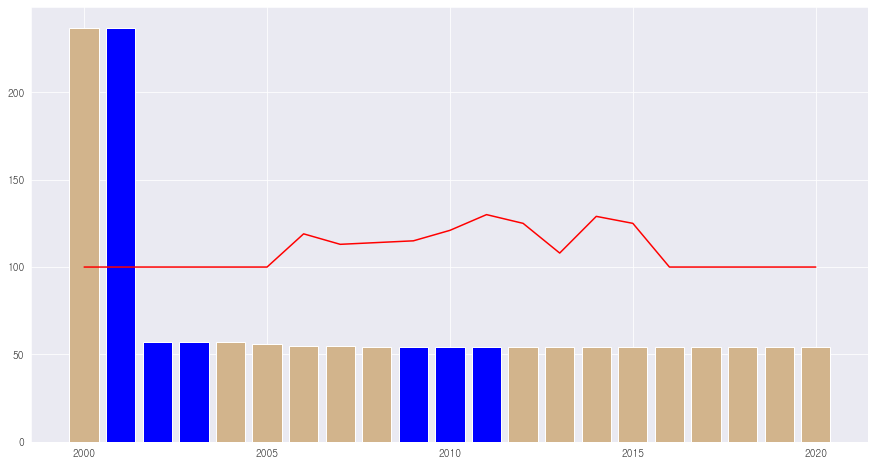

In [36]:
aa=df_green_concat_T[11]
aa.reset_index()
bb=aa.reset_index()
bb.columns=['연도',df_green_city_list[10]]
bb=bb.drop(0)
bb['연도']=bb['연도'].str.replace('지정면적','')
bb['연도']=bb['연도'].astype('int64')
bb['충청북도']=bb['충청북도'].astype('int64')
cc=pd.merge(bb,cb_bread,on='연도')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 8))
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# sns.barplot(data=cc,x='연도',y='충청북도')
# sns.lineplot(x='연도',y='충북 개업 제과점',data=cc)
plt.bar(cc['연도'],cc['충청북도'],color=['tan','b','b','b','tan','tan','tan','tan','tan','b','b','b','tan','tan','tan','tan','tan','tan','tan','tan','tan'])
plt.plot(cc['연도'],cc['충북 개업 제과점']+100,color='r')

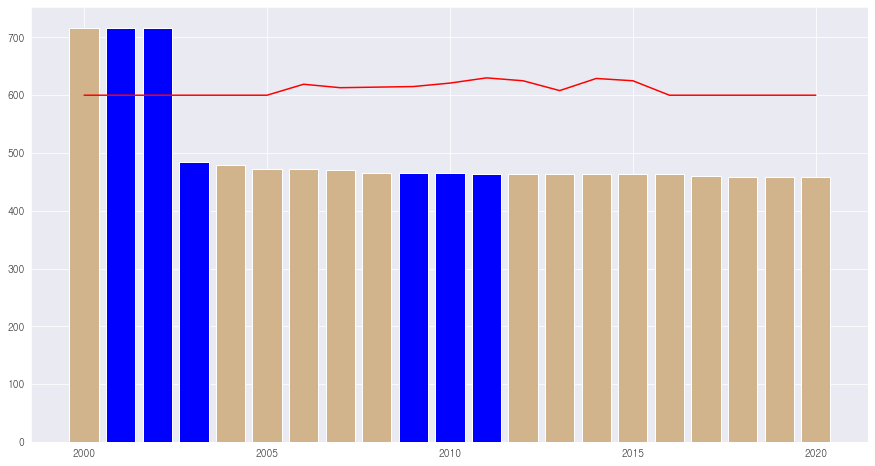

In [37]:
aa=df_green_concat_T[16]
aa.reset_index()
bb=aa.reset_index()
bb.columns=['연도',df_green_city_list[15]]
bb=bb.drop(0)
bb['연도']=bb['연도'].str.replace('지정면적','')
bb['연도']=bb['연도'].astype('int64')
bb['경상남도']=bb['경상남도'].astype('int64')
cc=pd.merge(bb,gn_bread,on='연도')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 8))
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# sns.barplot(data=cc,x='연도',y='충청북도')
# sns.lineplot(x='연도',y='충북 개업 제과점',data=cc)
plt.bar(cc['연도'],cc['경상남도'],color=['tan','b','b','b','tan','tan','tan','tan','tan','b','b','b','tan','tan','tan','tan','tan','tan','tan','tan','tan'])
plt.plot(cc['연도'],cc['경남 개업 제과점']+600,color='r')

### 🍰 그린벨트의 변동 추이가 작았던 지역(경북, 충남)

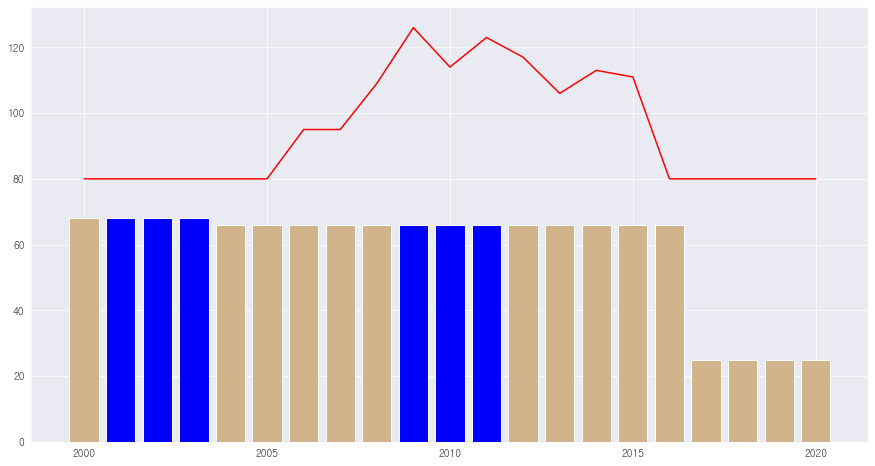

In [38]:
aa=df_green_concat_T[12]
aa.reset_index()
bb=aa.reset_index()
bb.columns=['연도',df_green_city_list[11]]
bb=bb.drop(0)
bb['연도']=bb['연도'].str.replace('지정면적','')
bb['연도']=bb['연도'].astype('int64')
bb['충청남도']=bb['충청남도'].astype('int64')
cc=pd.merge(bb,cn_bread,on='연도')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 8))
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# sns.barplot(data=cc,x='연도',y='충청북도')
# sns.lineplot(x='연도',y='충북 개업 제과점',data=cc)
plt.bar(cc['연도'],cc['충청남도'],color=['tan','b','b','b','tan','tan','tan','tan','tan','b','b','b','tan','tan','tan','tan','tan','tan','tan','tan','tan'])
plt.plot(cc['연도'],cc['충남 개업 제과점']+80,color='r')

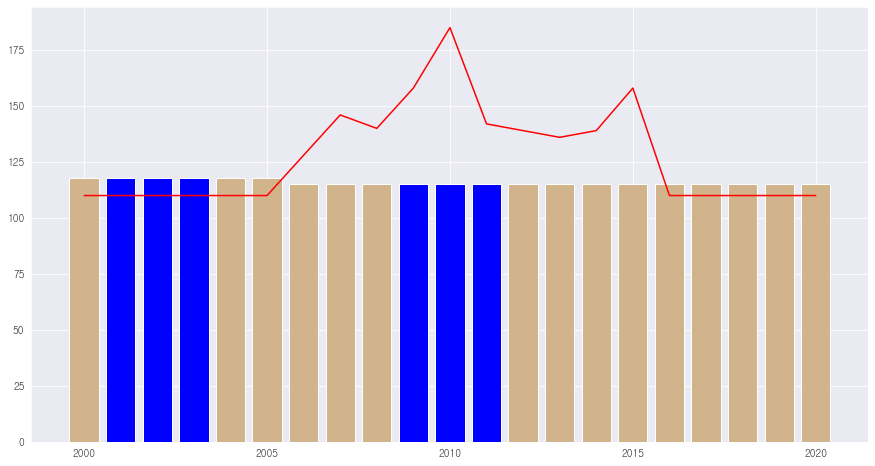

In [39]:
aa=df_green_concat_T[15]
aa.reset_index()
bb=aa.reset_index()
bb.columns=['연도',df_green_city_list[14]]
bb=bb.drop(0)
bb['연도']=bb['연도'].str.replace('지정면적','')
bb['연도']=bb['연도'].astype('int64')
bb['경상북도']=bb['경상북도'].astype('int64')
cc=pd.merge(bb,gb_bread,on='연도')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 8))
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# sns.barplot(data=cc,x='연도',y='충청북도')
# sns.lineplot(x='연도',y='충북 개업 제과점',data=cc)
plt.bar(cc['연도'],cc['경상북도'],color=['tan','b','b','b','tan','tan','tan','tan','tan','b','b','b','tan','tan','tan','tan','tan','tan','tan','tan','tan'])
plt.plot(cc['연도'],cc['경북 개업 제과점']+110,color='r')

### 🔑 결론

그린벨트가 해제되면 그곳에서는 여러가지 개발이 진행됩니다

먼저 건물이 들어서게 되는데 이 건물이 완성되는데는 약 10년정도가 걸린다고 합니다.

이렇게 주거지역과 상권들이 들어서게 되면 필연적으로 창업성공확률 또한 증가할 것이라 생각하였습니다.

그것에 입각하여 창업성공확률을 높이기 위해 필요한 여러가지 요인 중 하나로

10년전 그린벨트 해제지역 또한 고려해 볼 수 있다고 생각합니다.